#### Figure 2A
The results of WCSGNet are derived from the Mean-F1 score obtained by running src/ewcsn_classify_test.py.

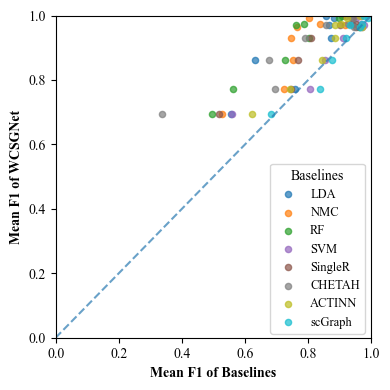

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.family"] = "Times New Roman"

WCSGNet = [0.772 ,0.861 ,	0.693 ,	0.975 ,	0.964 ,	0.992 ,	1.000 ,	0.929 ,	0.969 ]
baselines = {
'LDA':[0.757, 0.633 ,	0.556 ,	0.940 ,	0.964 ,	0.881 ,	0.858 ,	0.873 ,	0.865 ],
'NMC':	[0.722, 0.753 ,	0.527, 	0.836 ,	0.763 ,	0.804 ,	0.949 ,	0.745 ,	0.917 ],
'RF':	[0.562, 0.727 ,	0.495 ,	0.788 ,	0.962 ,	0.899 ,	0.906 ,	0.803 ,	0.761 ],
'SVM':	[0.805, 0.853 ,	0.558 ,	0.967 ,	0.970 ,	0.952 ,	0.967 ,	0.910 ,	0.978 ],
'SingleR':	[0.746, 0.767 ,	0.517 ,	0.953 ,	0.952 ,	0.938 ,	0.920 ,	0.809 ,	0.901 ],
'CHETAH':	[0.695,	0.677 ,	0.338 ,	0.927 ,	0.945 ,	0.942 ,	0.934 ,	0.789 ,	0.856 ],
'ACTINN':	[0.741 ,0.843 ,	0.623 ,	0.904 ,	0.969 ,	0.922 ,	0.965 ,	0.886 ,	0.886 ],
'scGraph':	[0.839, 0.877 ,	0.681 ,	0.969 ,	0.964 ,	0.990 ,	0.976 ,	0.921 ,	0.934 ],
}

# Create color mapping
colors = plt.cm.tab10(np.linspace(0, 1, len(baselines)))

plt.figure(figsize=(4, 4))

plt.plot([0, 1], [0, 1], '--', color='#2A7AB1', alpha=0.7, label='_nolegend_')

# Plot scatter points
for (name, scores), color in zip(baselines.items(), colors):
    plt.scatter(scores, WCSGNet, color=color, alpha=0.7, label=name, s=20)

# Set chart properties
plt.xlabel('Mean F1 of Baselines',fontsize=10, fontweight="bold")
plt.ylabel('Mean F1 of WCSGNet', fontsize=10,fontweight="bold")

# Set axis ranges
plt.xlim(0, 1)
plt.ylim(0, 1)

# Add legend
plt.legend(bbox_to_anchor=(0.66, 0.56), loc='upper left',fontsize=9, title='Baselines')

# Adjust layout
plt.tight_layout()
plt.savefig('../../result/Figures/Figure_2A.svg', format='svg', dpi=1200, bbox_inches='tight')
plt.savefig('../../result/Figures/Figure_2A.png', format='png', dpi=1200, bbox_inches='tight')

plt.show()

#### Figure 2B

<Figure size 28800x19200 with 0 Axes>

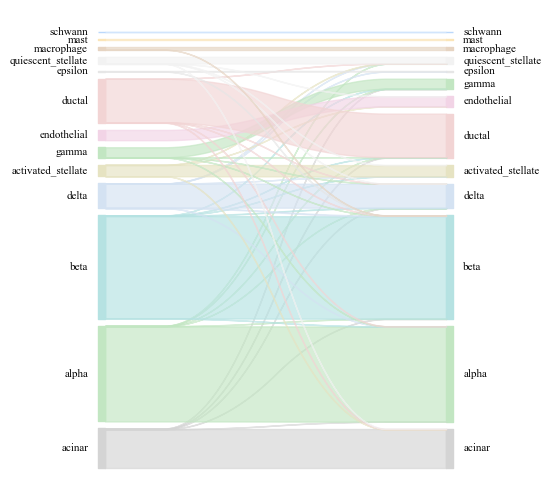

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pySankey.sankey import sankey

from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'

def plot_cell_type_sankey(seq_dict_file, pred_file, figure_size=(24, 16), dpi=1200):
    try:
        seq_dict = np.load(seq_dict_file, allow_pickle=True)
        str_labels = seq_dict['str_labels']
    except Exception as e:
        raise Exception(f"load cell type label error: {e}")
        
    try:
        cell_type = pd.read_hdf(pred_file, key='cell_type')
    except Exception as e:
        raise Exception(f"load pred file error: {e}")

    true_labels = cell_type['true_cell_type'].values
    pred_labels = cell_type['pred_cell_type'].values
    
    true_label = [str_labels[label] for label in true_labels]
    pred_label = [str_labels[label] for label in pred_labels]

    color_dict = {
        'alpha': '#c2e6c2',          
        'beta': '#b5e2e2',           
        'ductal': '#f2d4d4',         
        'delta': '#d4e2f2',         
        'gamma': '#c2e6c2',          
        'activated_stellate': '#e6e3c2', 
        'acinar': '#d4d4d4',         
        'endothelial': '#f2d4e6',    
        'macrophage': '#e6d4c2',    
        'epsilon': '#e6e6e6',        
        'quiescent_stellate': '#f2f2f2', 
        'schwann': '#BAD8FB',       
        'mast': '#FBE5B8',         
    }

    plt.figure(figsize=figure_size, dpi=dpi)
    
    plt.rcParams.update({
        'font.family': 'Times New Roman',
        'font.weight': 'normal',
        'font.size': 10,
        'axes.labelweight': 'normal',
        'axes.titleweight': 'normal'
    })
    
    try:
        sankey(
            right=true_label,    
            left=pred_label,      
            colorDict=color_dict, 
            aspect=15,            
            fontsize=8,           
            figure_name=plt.gcf()
        )
    except Exception as e:
        raise Exception(f"Sankey error: {e}")
    
    for text in plt.gca().texts:
        text.set_fontname('Times New Roman')

    plt.subplots_adjust(left=0.2, right=0.85, top=0.9, bottom=0.1)  

    for i, text in enumerate(plt.gca().texts):
        if i < len(true_label):  
            text.set_position((text.get_position()[0] - 0.05, text.get_position()[1])) 
        else: 
            text.set_position((text.get_position()[0] + 0.05, text.get_position()[1])) 


    plt.savefig("../../result/Figures/exp_baselines/sankey_Baron_Human.svg", format="svg", dpi=dpi)
    plt.savefig("../../result/Figures/exp_baselines/sankey_Baron_Human.png", format="png", dpi=dpi)
    plt.show()


seq_dict_file = '../../dataset/5fold_data/Baron_Human/seq_dict.npz'
pred_path = '../../result/preds/Baron_Human_HumanNet-GSP_a0.01_hvgs2000_prediction.h5'

plot_cell_type_sankey(seq_dict_file, pred_path)
